<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84_2022%ED%95%99%EB%85%84%EB%8F%84%EC%8B%A0%EB%AA%A9%EC%A7%84%ED%95%99%EA%B2%B0%EA%B3%BC_RPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl
import csv

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
#df = pd.read_csv('/content/drive/MyDrive/python/susi_2021_noname.csv', encoding = 'cp949')
#df = pd.read_csv('/content/drive/MyDrive/python/sinmok/susi_2021.csv', encoding = 'cp949')
df = pd.read_csv('/content/drive/MyDrive/python/sinmok/susi_jsi_sinmok21.csv', encoding = 'cp949')


# 첫 5줄을 봅니다.
df.head(4)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


***2022 S고 합격자수***
서울대 합격자수 - 수시: 0명, 정시: 2명
연세대 합격자수 - 수시: 3명, 정시: 3명
고려대 합격자수 - 수시: 9명, 정시: 7명
서강대 합격자수 - 수시: 1명, 정시: 4명
성균관대 합격자수 - 수시: 6명, 정시: 11명
한양대 합격자수 - 수시: 2명, 정시: 5명
중앙대 합격자수 - 수시: 5명, 정시: 17명
경희대 합격자수 - 수시: 2명, 정시: 7명
서울시립대 합격자수 - 수시: 0명, 정시: 1명
이화여대 합격자수 - 수시: 3명, 정시: 7명
건국대 합격자수 - 수시: 1명, 정시: 2명
동국대 합격자수 - 수시: 2명, 정시: 3명
홍익대 합격자수 - 수시: 5명, 정시: 1명
국민대 합격자수 - 수시: 1명, 정시: 1명
세종대 합격자수 - 수시: 3명, 정시: 2명


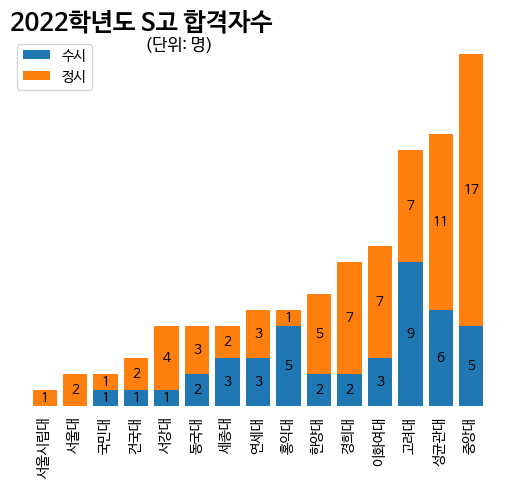

In [33]:
#RPA로 합불자료에서 그래프 자동 완성

import pandas as pd
import matplotlib.pyplot as plt

uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대', '국민대', '숭실대', '세종대']

# assuming that you have a DataFrame called "df" containing admission information for each student
# and the relevant columns are "수시정시", "대학", and "최종"
#df = pd.read_csv("/content/drive/MyDrive/python/susi_2021_noname.csv", encoding = 'cp949')  # replace with your own file name
df = pd.read_csv('/content/drive/MyDrive/python/sinmok/susi_jsi_sinmok21.csv', encoding = 'cp949')

print("\n***2022 S고 합격자수***")

uni_new = []
num_su = []
num_je = []

for u in uni:
    df_u = df[(df.대학 == u) & (df.최종 == '합')]
    df_u = df_u[['수시정시', '학번', '대학', '최종']]

    num_su_u = len(df_u[df_u['수시정시'] == '수시'])
    num_je_u = len(df_u[df_u['수시정시'] == '정시'])

    if (num_su_u > 0) or (num_je_u > 0):
        uni_new.append(u)
        num_su.append(num_su_u)
        num_je.append(num_je_u)

        print(u, "합격자수 - 수시:", str(num_su_u) + "명,", "정시:", str(num_je_u) + "명")

if len(uni_new) > 0:
    # sort the data by the total number of admissions (sum of num_su and num_je)
    data = sorted(zip(uni_new, num_su, num_je), key=lambda x: x[1]+x[2], reverse=False)
    uni_new = [x[0] for x in data]
    num_su = [x[1] for x in data]
    num_je = [x[2] for x in data]

    # plot the bar graph

    fig, ax = plt.subplots()

    # Only plot num_su if num_su_u is greater than 0
    if any(num_su):
        ax.bar(uni_new, num_su, label='수시')

    # Only plot num_je if num_je_u is greater than 0
    if any(num_je):
        ax.bar(uni_new, num_je, bottom=num_su, label='정시')

    # add value labels
    for i, (su, je) in enumerate(zip(num_su, num_je)):
        if su > 0:
            ax.text(i, su/2, su, ha='center', va='center')
        if je > 0:
            ax.text(i, su + je/2, je, ha='center', va='center')

    ax.legend()
    # 그래프 제목
    ax.set_title('2022학년도 S고 합격자수', fontsize=18, fontweight='bold', loc='left')

    # 그래프 부제목
    ax.text(0.34, 1.00, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

    # Rotate x-axis labels by 90 degrees and align them to the right
    plt.xticks(rotation=90, ha='center')
    ax.tick_params(axis='x', which='both', bottom=False)  # Remove x-axis ticks

    plt.box(False) #테두리 박스 제거
    plt.yticks([]) #y축 제거
    plt.show()
else:
    print("조건에 맞는 대학이 없습니다.")
